In [2]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import yfinance as yf
from pykalman import KalmanFilter

In [3]:
data = yf.download(
    "TUPRS.IS", period="max", interval="1h", start="2021-07-15"
)  # Start date must be within the last 60 days for 5m frequency.
data.drop(["Close"], axis=1, inplace=True)
data.rename(columns={"Adj Close": "Close"}, inplace=True)
data.index.name = "Date"
df = data.copy()
data = data["Close"]
data

[*********************100%***********************]  1 of 1 completed


Date
2021-07-16 09:30:00+03:00     95.250000
2021-07-16 10:30:00+03:00     94.900002
2021-07-16 11:30:00+03:00     94.750000
2021-07-16 12:30:00+03:00     94.500000
2021-07-16 13:30:00+03:00     94.699997
                                ...    
2021-09-02 13:30:00+03:00    104.800003
2021-09-02 14:30:00+03:00    105.099998
2021-09-02 15:30:00+03:00    104.800003
2021-09-02 16:30:00+03:00    104.699997
2021-09-02 17:30:00+03:00    105.000000
Name: Close, Length: 237, dtype: float64

In [4]:
# SMA for baseline comparison
sma5 = df.ta.sma(5)
sma22 = df.ta.sma(22)

In [5]:
# Kalman Filter
kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    initial_state_mean=data.values[0],  # First value as initial mean
    initial_state_covariance=1,
    observation_covariance=1,
    transition_covariance=0.01,
)

state_means, _ = kf.filter(data)

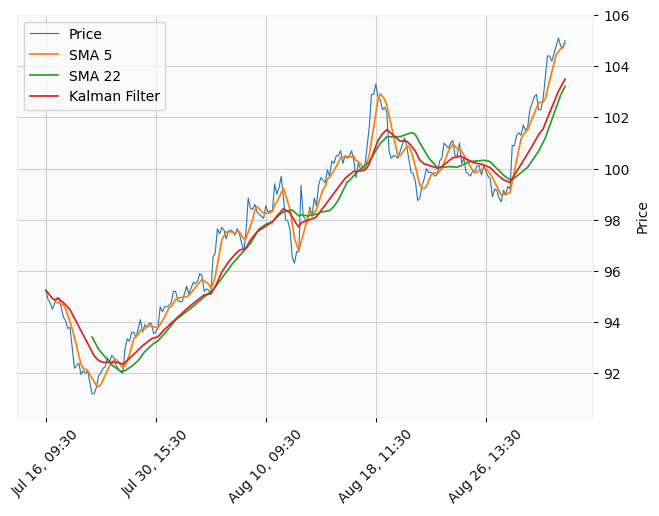

In [6]:
fig, axes = mpf.plot(
    df,
    type="line",
    style="yahoo",
    addplot=[
        mpf.make_addplot(sma5),
        mpf.make_addplot(sma22),
        mpf.make_addplot(state_means),
    ],
    returnfig=True,
)

axes[0].legend(["Price", "SMA 5", "SMA 22", "Kalman Filter"])

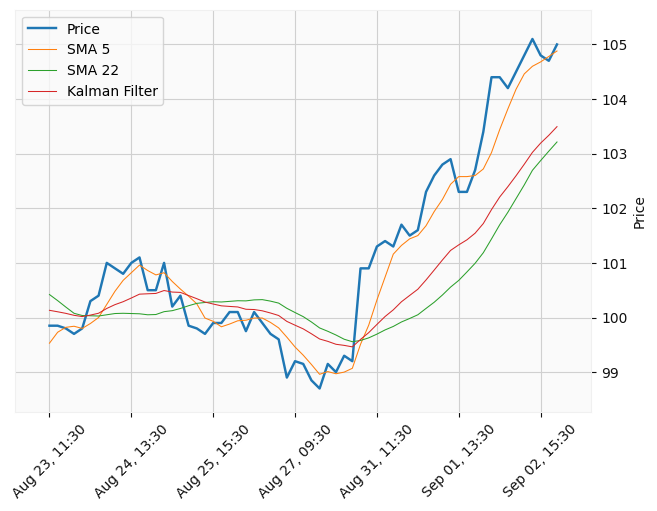

In [7]:
# Close look for differences
n = 63

fig, axes = mpf.plot(
    df.iloc[-n:, ],
    type="line",
    style="yahoo",
    addplot=[
        mpf.make_addplot(
            sma5[-n:, ],
            width=0.75,
        ),
        mpf.make_addplot(
            sma22[-n:, ],
            width=0.75,
        ),
        mpf.make_addplot(
            state_means[-n:, ],
            width=0.75,
        ),
    ],
    returnfig=True,
)

axes[0].legend(["Price", "SMA 5", "SMA 22", "Kalman Filter"])